In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy import *
import math
import seaborn as sns
plt.style.use('seaborn')

In [17]:
le_data = pd.read_csv("life-expectancy.csv")
le_data

,country,year,expectancy
0,Afghanistan,2008,42
1,Albania,2008,73
2,Algeria,2008,71
3,Angola,2008,46
4,Antigua and Barbuda,2008,74
...,...,...,...
182,Venezuela (Bolivarian Republic of),2008,75
183,Viet Nam,2008,73
184,Yemen,2008,64
185,Zambia,2008,48


In [214]:
br_yearly_data = pd.read_csv("birth-rates-yearly.csv")
br_yearly_data.head()

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994


In [13]:
br_data = pd.read_csv("birth-rate.csv")
br_data.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


In [235]:
cr_data = pd.read_csv("crimerates-by-state-2005.csv")
cr_data.head(10)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255
6,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780
7,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8,3477416
8,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5,839906
9,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3,582049


In [11]:
tv_data = pd.read_csv("tv_sizes.txt", delimiter='\t')
tv_data.head()

,year,size
0,2009,52
1,2009,40
2,2009,65
3,2009,46
4,2009,55


In [60]:
tv_grouped = tv_data[tv_data['year'] < 2009].groupby('year').mean().reset_index()
avg_tv_size = tv_grouped['size'].to_list()
avg_tv_size

[38.5,
 36.61904761904762,
 35.72093023255814,
 43.38095238095238,
 43.96103896103896,
 44.75409836065574,
 46.610169491525426,
 46.87755102040816]

In [61]:
us_data = br_data[br_data['Country'] == 'United States'].T
us_data = us_data[1:].reset_index()
us_data.columns = ['Year','Birth_Rate']
us_data['Year'] = us_data['Year'].astype(int)
us_data = us_data[us_data['Year'] > 2000]
us_data['TV_Size'] = avg_tv_size
us_data

,Year,Birth_Rate,TV_Size
41,2001,14.1,38.500000
42,2002,13.9,36.619048
43,2003,14.14,35.720930
44,2004,14.13,43.380952
45,2005,14,43.961039
46,2006,14.2,44.754098
47,2007,14.2541,46.610169
48,2008,14.301,46.877551


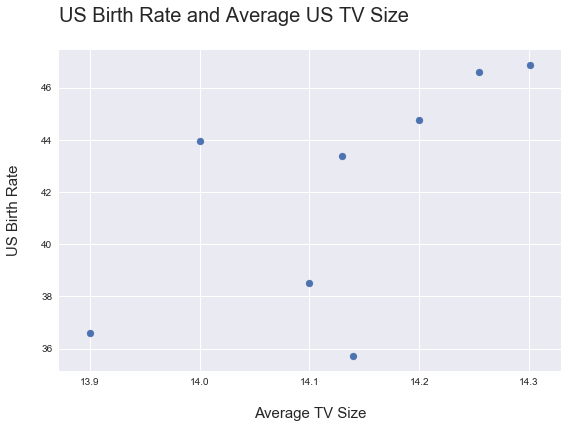

In [211]:
fig, ax = plt.subplots()

ax.scatter(us_data['Birth_Rate'], us_data['TV_Size'])

ax.set_xlabel('Average TV Size', fontsize = 15)
ax.set_ylabel('US Birth Rate', fontsize = 15)
ax.set_title('US Birth Rate and Average US TV Size\n', fontsize = 20, loc = "left")
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.savefig('scatter.png')
plt.show()

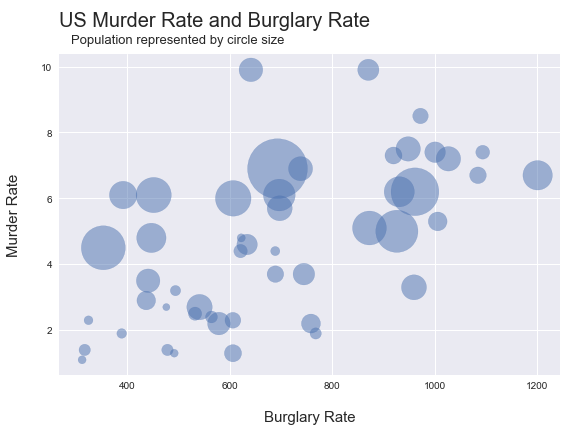

In [239]:
cr_data_modified = cr_data[cr_data['state'] != 'District of Columbia'][1:]

fig, ax = plt.subplots()

ax.scatter(cr_data_modified['burglary'][1:], cr_data_modified['murder'][1:], s = cr_data_modified['population'][1:]/10000, alpha = 0.5)
ax.set_xlabel('Burglary Rate', fontsize = 15)
ax.set_ylabel('Murder Rate', fontsize = 15)
ax.set_title('US Murder Rate and Burglary Rate\n', fontsize = 20, loc = "left")
fig.suptitle('\n\nPopulation represented by circle size\n', x=0.1, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 13)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.savefig('bubble.png')
plt.show()

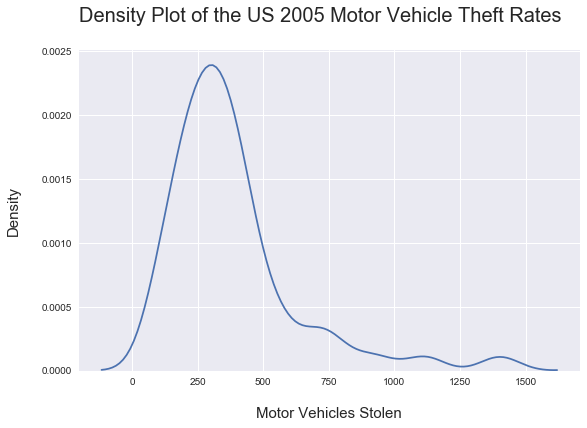

In [255]:
sns.distplot(cr_data['motor_vehicle_theft'][1:], hist = False, kde = True)
plt.title('Density Plot of the US 2005 Motor Vehicle Theft Rates\n', fontsize = 20, loc = "left")
plt.xlabel('\nMotor Vehicles Stolen', fontsize = 15)
plt.ylabel('Density\n', fontsize = 15)
plt.savefig('density.png')
plt.show()